<a href="https://colab.research.google.com/github/Yug3737/Character-Recognition/blob/main/Final_Character_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from zipfile import ZipFile
import os
import numpy as np
from PIL import Image

In [ ]:
df=pd.read_csv("/content/english.csv")

In [ ]:
df.columns

Index(['image', 'label'], dtype='object')

In [ ]:
y_old=df['label']

In [ ]:
y_old=np.array(y_old)

In [ ]:
image_names=df['image']

In [ ]:
y=[]
freq=dict((i,0) for i in range(62))
different_char=[]

In [ ]:
for i in range(len(y_old)):
  if y_old[i] not in different_char:
    different_char.append(y_old[i])
  if y_old[i]>='0' and y_old[i]<='9':
    y.append(ord(y_old[i])-48)
    freq[ord(y_old[i])-48]+=1
  elif y_old[i]>='A' and y_old[i]<='Z':
    y.append(ord(y_old[i])-55)
    freq[ord(y_old[i])-55]+=1
  else:
    y.append(ord(y_old[i])-61)
    freq[ord(y_old[i])-61]+=1


In [ ]:
freq

{0: 55,
 1: 55,
 2: 55,
 3: 55,
 4: 55,
 5: 55,
 6: 55,
 7: 55,
 8: 55,
 9: 55,
 10: 55,
 11: 55,
 12: 55,
 13: 55,
 14: 55,
 15: 55,
 16: 55,
 17: 55,
 18: 55,
 19: 55,
 20: 55,
 21: 55,
 22: 55,
 23: 55,
 24: 55,
 25: 55,
 26: 55,
 27: 55,
 28: 55,
 29: 55,
 30: 55,
 31: 55,
 32: 55,
 33: 55,
 34: 55,
 35: 55,
 36: 55,
 37: 55,
 38: 55,
 39: 55,
 40: 55,
 41: 55,
 42: 55,
 43: 55,
 44: 55,
 45: 55,
 46: 55,
 47: 55,
 48: 55,
 49: 55,
 50: 55,
 51: 55,
 52: 55,
 53: 55,
 54: 55,
 55: 55,
 56: 55,
 57: 55,
 58: 55,
 59: 55,
 60: 55,
 61: 55}

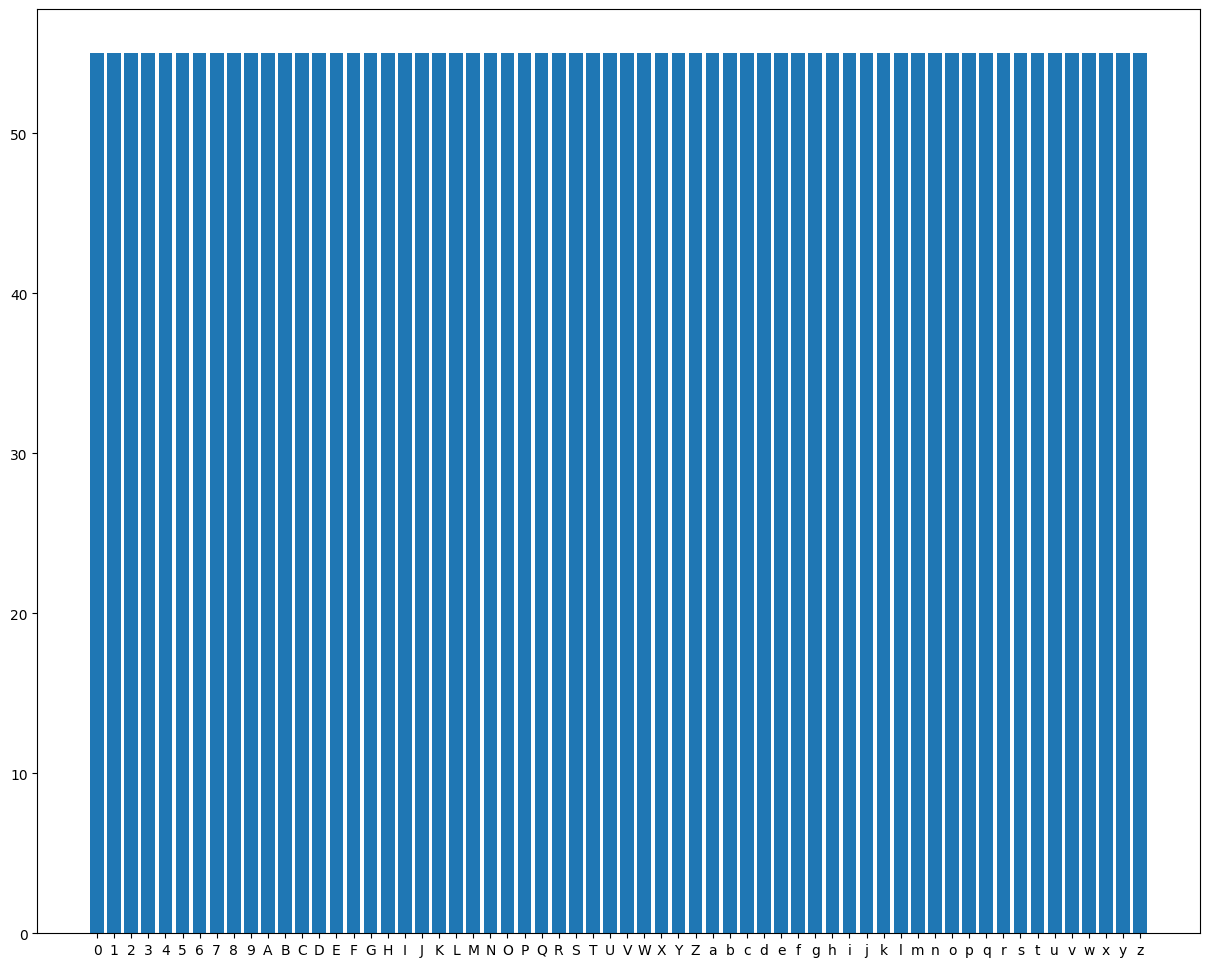

In [ ]:
import matplotlib.pyplot as plt
y_values=list(freq.values())
plt.figure(figsize=(15,12))
plt.bar(different_char,y_values)
plt.show()

In [ ]:
zip_path="/content/Img.zip"
extracted_path="/content/images"
with ZipFile(zip_path,"r") as zip:
  zip.extractall(extracted_path)

In [ ]:
image_files=[]
for i in range(len(y)):
  image_files.append(extracted_path+"/"+image_names[i])

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
first_image=cv2.imread(image_files[0])


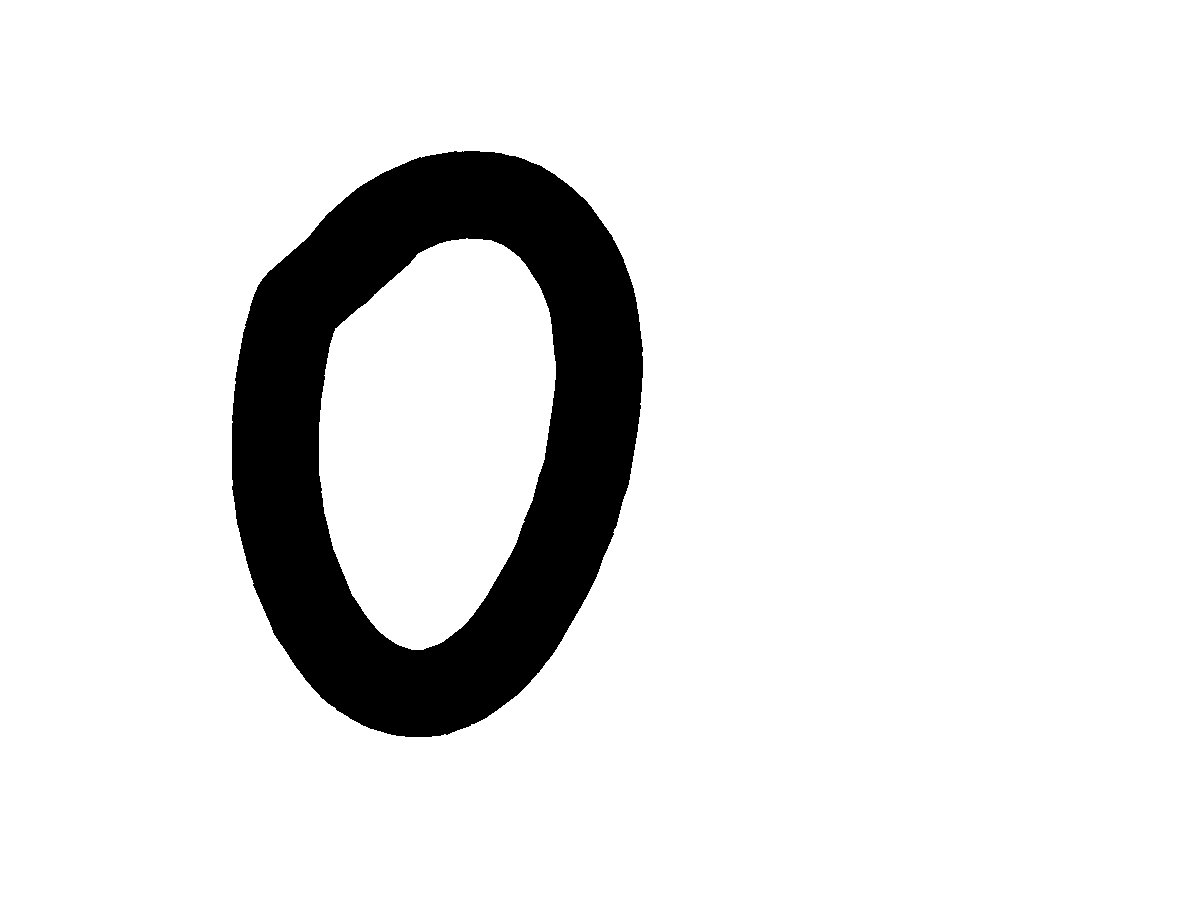

In [ ]:
cv2_imshow(first_image)

In [ ]:
x=[]
for img_path in image_files:
    image = Image.open(img_path).convert('L')  # Convert to grayscale
    resized_image = image.resize((28, 28))    # Resize to 28x28
    image_array = np.array(resized_image) / 255.0  # Normalize pixel values to [0, 1]
    x.append(image_array)

In [ ]:
x=np.array(x)

In [ ]:
unshuffled_x=x
unshuffled_y=y

In [ ]:
y=np.eye(62)[y]

In [ ]:
import random
indices = list(range(len(y)))
random.shuffle(indices)

x = [x[i] for i in indices]
y = [y[i] for i in indices]
x= np.array(x)
y = np.array(y)

In [ ]:
x=x.reshape(x.shape[0],784)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=55)


In [ ]:
print("no of samples for training")
print(x_train.shape)
print("no of samples for testing")
print(x_test.shape)
loss_during_training=[]

no of samples for training
(3069, 784)
no of samples for testing
(341, 784)


In [ ]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)



class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.weights1 = np.random.randn(input_size, hidden_sizes[0]) * 0.01
        self.bias1 = np.zeros((1, hidden_sizes[0]))

        self.weights2 = np.random.randn(hidden_sizes[0], hidden_sizes[1]) * 0.01
        self.bias2 = np.zeros((1, hidden_sizes[1]))

        self.weights3 = np.random.randn(hidden_sizes[1], hidden_sizes[2]) * 0.01
        self.bias3 = np.zeros((1, hidden_sizes[2]))

        self.weights4 = np.random.randn(hidden_sizes[2], output_size) * 0.01
        self.bias4 = np.zeros((1, output_size))

        self.learning_rate = 0.01


    def forward(self, X):
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = relu(self.z1)

        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = relu(self.z2)

        self.z3 = np.dot(self.a2, self.weights3) + self.bias3
        self.a3 = relu(self.z3)

        self.z4 = np.dot(self.a3, self.weights4) + self.bias4
        self.a4 = softmax(self.z4)

        return self.a4


    def backward(self, X, y, y_pred):
        m = y.shape[0]


        d_z4 = y_pred - y
        d_weights4 = np.dot(self.a3.T, d_z4) / m
        d_bias4 = np.sum(d_z4, axis=0, keepdims=True) / m


        d_a3 = np.dot(d_z4, self.weights4.T)
        d_z3 = d_a3 * relu_derivative(self.z3)
        d_weights3 = np.dot(self.a2.T, d_z3) / m
        d_bias3 = np.sum(d_z3, axis=0, keepdims=True) / m


        d_a2 = np.dot(d_z3, self.weights3.T)
        d_z2 = d_a2 * relu_derivative(self.z2)
        d_weights2 = np.dot(self.a1.T, d_z2) / m
        d_bias2 = np.sum(d_z2, axis=0, keepdims=True) / m


        d_a1 = np.dot(d_z2, self.weights2.T)
        d_z1 = d_a1 * relu_derivative(self.z1)
        d_weights1 = np.dot(X.T, d_z1) / m
        d_bias1 = np.sum(d_z1, axis=0, keepdims=True) / m


        self.weights4 -= self.learning_rate * d_weights4
        self.bias4 -= self.learning_rate * d_bias4
        self.weights3 -= self.learning_rate * d_weights3
        self.bias3 -= self.learning_rate * d_bias3
        self.weights2 -= self.learning_rate * d_weights2
        self.bias2 -= self.learning_rate * d_bias2
        self.weights1 -= self.learning_rate * d_weights1
        self.bias1 -= self.learning_rate * d_bias1


    def train(self, X, y, epochs, batch_size):
        for epoch in range(epochs):

            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
            X = X[indices]
            y = y[indices]


            for i in range(0, X.shape[0], batch_size):
                X_batch = X[i:i + batch_size]
                y_batch = y[i:i + batch_size]


                y_pred = self.forward(X_batch)
                self.backward(X_batch, y_batch, y_pred)

            y_pred = self.forward(X)
            loss = -np.mean(np.sum(y * np.log(y_pred + 1e-8), axis=1))
            loss_during_training.append(loss)
            if (epoch+1)%100==0:
              print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")


    def predict(self, X):
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)


In [ ]:
input_size = 784
hidden_sizes = [512, 256, 128]
output_size = 62
epochs = 10000
batch_size = 64

nn = NeuralNetwork(input_size, hidden_sizes, output_size)
nn.train(x_train, y_train, epochs=epochs, batch_size=batch_size)


y_test_pred = nn.predict(x_test)
y_test_true = np.argmax(y_test, axis=1)



Epoch 100/10000, Loss: 4.1261
Epoch 200/10000, Loss: 4.1258
Epoch 300/10000, Loss: 4.1257
Epoch 400/10000, Loss: 4.1257
Epoch 500/10000, Loss: 4.1256
Epoch 600/10000, Loss: 4.1253
Epoch 700/10000, Loss: 4.1247
Epoch 800/10000, Loss: 4.1187
Epoch 900/10000, Loss: 3.3839
Epoch 1000/10000, Loss: 3.0738
Epoch 1100/10000, Loss: 2.6681
Epoch 1200/10000, Loss: 2.3191
Epoch 1300/10000, Loss: 2.0279
Epoch 1400/10000, Loss: 1.7188
Epoch 1500/10000, Loss: 1.1911
Epoch 1600/10000, Loss: 0.8900
Epoch 1700/10000, Loss: 0.6771
Epoch 1800/10000, Loss: 0.9314
Epoch 1900/10000, Loss: 0.5138
Epoch 2000/10000, Loss: 1.4159
Epoch 2100/10000, Loss: 0.2177
Epoch 2200/10000, Loss: 0.1291
Epoch 2300/10000, Loss: 0.1506
Epoch 2400/10000, Loss: 0.0662
Epoch 2500/10000, Loss: 0.1505
Epoch 2600/10000, Loss: 0.0713
Epoch 2700/10000, Loss: 0.0334
Epoch 2800/10000, Loss: 0.5686
Epoch 2900/10000, Loss: 0.0390
Epoch 3000/10000, Loss: 0.0259
Epoch 3100/10000, Loss: 0.0176
Epoch 3200/10000, Loss: 0.0123
Epoch 3300/10000,

In [ ]:
unshuffled_x=unshuffled_x.reshape(unshuffled_x.shape[0],784)
all_pred=nn.predict(unshuffled_x)


In [ ]:
count=0
for i in range(len(y)):
  if all_pred[i]==unshuffled_y[i]:
    count+=1
print("accuracy")
print(count/len(y))

accuracy
0.9533724340175953


In [ ]:
print(count)

3251


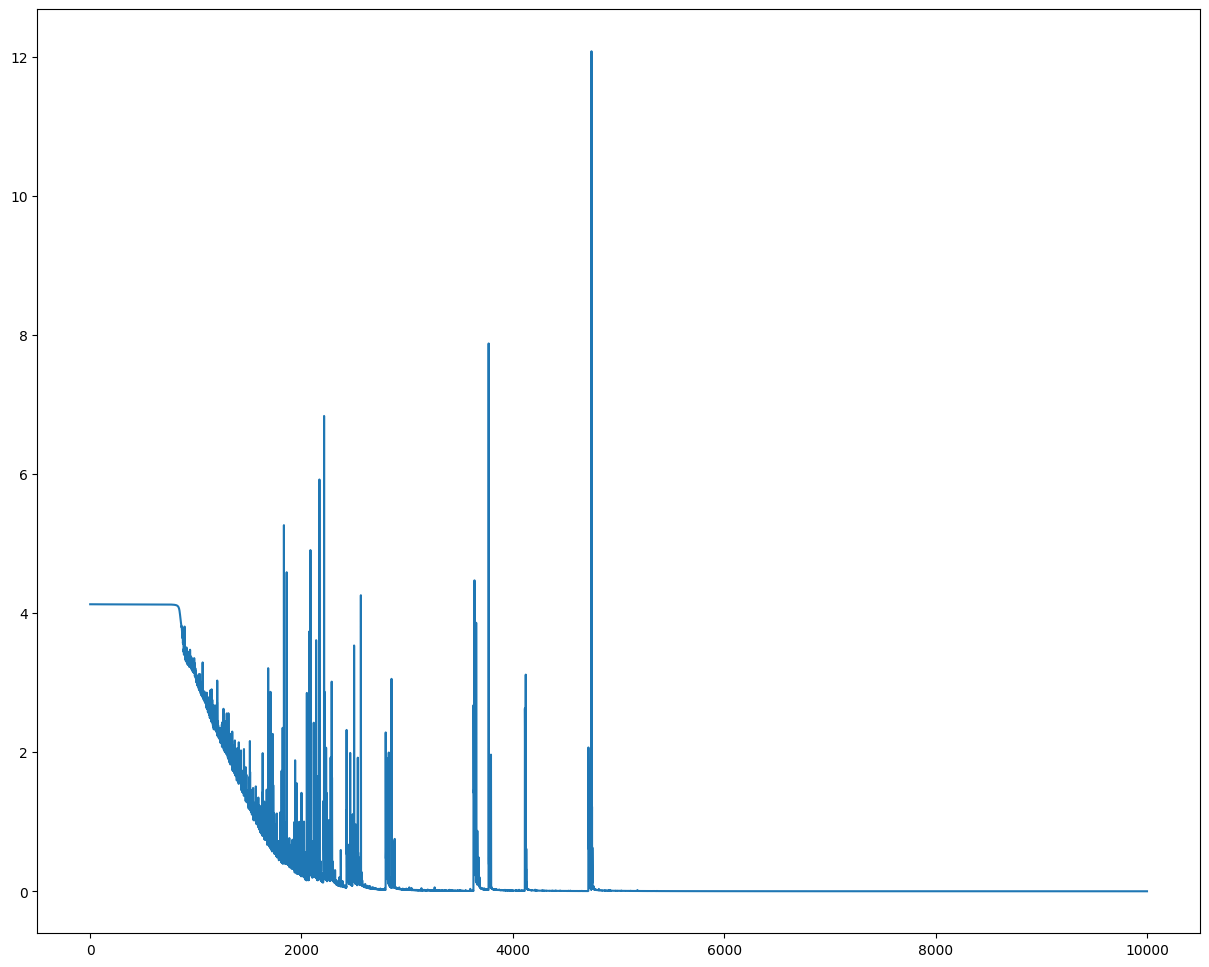

In [ ]:
x_loss_plot=[i for i in range(1,10001)]
plt.figure(figsize=(15,12))
plt.plot(x_loss_plot,loss_during_training)
plt.show()